In [1]:
import pandas as pd, numpy as np

In [3]:
df = pd.read_csv('Iris.csv')
df.drop(columns=['Id'],inplace=True)
df.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [9]:
from sklearn.metrics import log_loss

## USING LOGISTIC REGRESSION

In [5]:
# Step 2: Load Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 3: Explore Data
print("Dataset shape:", X.shape)
print("Target shape:", y.shape)
print("Class labels:", iris.target_names)

Dataset shape: (150, 4)
Target shape: (150,)
Class labels: ['setosa' 'versicolor' 'virginica']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define Model
model = LogisticRegression(max_iter=1000)


In [7]:
# Step 7: Train Model
model.fit(X_train, y_train)

# Step 8: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## USING SEQUENTIAL MODEL

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical



In [13]:
import matplotlib.pyplot as plt

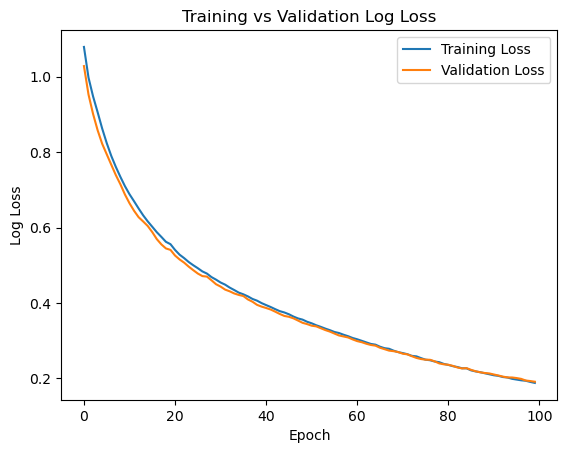

In [14]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert labels to one-hot encoded vectors
y_one_hot = to_categorical(y)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Define Sequential model
model = Sequential([
    Dense(100, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train model and track loss
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

# Plot training vs validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Log Loss')
plt.legend()
plt.show()